In [5]:
#Linear regression for bivariate dataset using normal form
units_used = [754, 244, 604, 410, 265, 417, 255, 525, 694, 647, 352, 150, 699, 580, 565]
elec_bill = [2053.91, 739.93, 1658.78, 1169.47, 780.63, 1191.02, 751.77, 1445.15, 1903.94, 1786.19, 1008.49, 487.22, 1850.46, 1602.69, 1563.45]

n = len(units_used)

totalX = totalY = squaredX = totalXY = 0

for val in units_used:
    totalX += val
    squaredX += (val*val)

for val in elec_bill:
    totalY += val

for valx,valy in zip(units_used,elec_bill):
    totalXY += (valx*valy)

meanX = totalX / n
meanY = totalY / n
meanSquaredX = squaredX / n
meanXY = totalXY / n

'''print(round(meanX,2))
print(round(meanY,2))
print(round(meanSquaredX,2))
print(round(meanXY,2))'''

a1 = (meanXY - (meanX * meanY)) / (meanSquaredX - (meanX * meanX))

a0 = meanY - a1 * meanX

print("Using normal linear regression form:\n")

print(f"Intercept is: {a0:.2f}")
print(f"Slope is: {a1:.2f}")

print(f"Equation is: Electricity bill = {a0:.2f} + {a1:.2f}*units used")

Using normal linear regression form:

Intercept is: 105.84
Slope is: 2.57
Equation is: Electricity bill = 105.84 + 2.57*units used


In [6]:
#Linear regression for bivariate dataset using matrix form
import pandas as pd
import numpy as np
#df = pd.DataFrame({'Units used': units_used, 'Electricity bill': elec_bill})

X = np.array(units_used).reshape(-1, 1) 
X = np.hstack((np.ones((X.shape[0], 1)), X)) 
y = np.array(elec_bill)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y)
coefficients = np.dot(XTX_inv, XTy)

intercept, slope = coefficients

print("Linear regression for bivariate dataset using matrix form:\n")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Linear regression equation is: electricity_bill_pred = {intercept:.2f} + {slope:.2f}*units_used")

Linear regression for bivariate dataset using matrix form:

Slope: 2.57
Intercept: 105.84
Linear regression equation is: electricity_bill_pred = 105.84 + 2.57*units_used


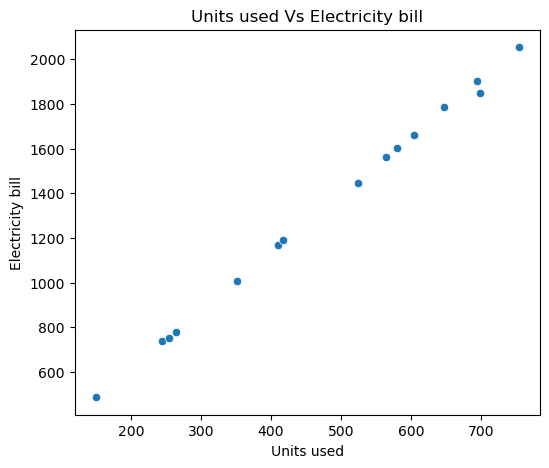

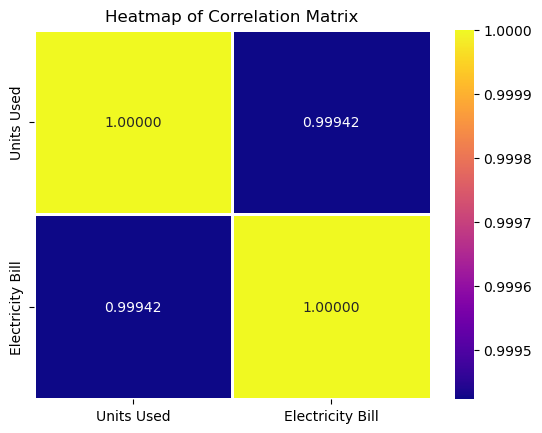

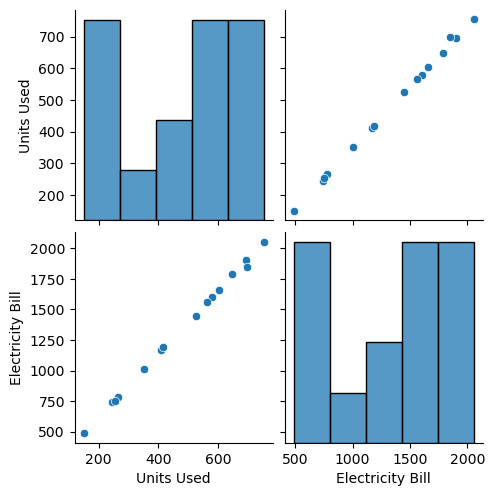

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({ 'Units Used': units_used, 'Electricity Bill': elec_bill})

plt.figure(figsize=(6,5))
sns.scatterplot(x = 'Units Used', y = 'Electricity Bill', data = df)
plt.title("Units used Vs Electricity bill")
plt.xlabel("Units used")
plt.ylabel("Electricity bill")
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='plasma', fmt=".5f", linewidth='1')
plt.title("Heatmap of Correlation Matrix")
plt.show()

sns.pairplot(df)
plt.show()

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("HousingData.xls")
data = data.dropna()

X = data.drop("MEDV", axis=1)
y = data["MEDV"]

model = LinearRegression()
model.fit(X, y)

print("\nOriginal Linear Regression Equation:")
print("MEDV =", end=" ")
for coef, name in zip(model.coef_, X.columns):
    print(f"{coef:.2f}*{name}", end=" + ")
print(f"{model.intercept_:.2f}")

sample1 = list(X.iloc[7])  
sample2 = [0.02289, 14.3, 5.78, 0, 0.425, 6.210, 64.3, 5.105, 3, 306, 15.1, 50.93, 14.9] 

print("\nPredictions using Original Model:")
print("Sample 1 (from dataset):", model.predict([sample1])[0], "| Actual:", y.iloc[4])
print("Sample 2 (custom):", model.predict([sample2])[0])

corr_matrix = X.corr().abs()
threshold = 0.85
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

print("\nFeatures dropped due to high correlation:", to_drop)

X_reduced = X.drop(columns=to_drop)
model_reduced = LinearRegression()
model_reduced.fit(X_reduced, y)

print("\nReduced Linear Regression Equation:")
print("MEDV =", end=" ")
for coef, name in zip(model_reduced.coef_, X_reduced.columns):
    print(f"{coef:.2f}*{name}", end=" + ")
print(f"{model_reduced.intercept_:.2f}")

sample1_series = pd.Series(sample1, index=data.columns.drop("MEDV")).drop(labels=to_drop)
sample2_series = pd.Series(sample2, index=data.columns.drop("MEDV")).drop(labels=to_drop)

print(f"Sample 1 (from dataset): {model_reduced.predict([sample1_series])[0]:.4f}, Actual: {y.iloc[4]:.4f}")
print(f"Sample 2 (custom): {model_reduced.predict([sample2_series])[0]:.4f}")


Original Linear Regression Equation:
MEDV = -0.10*CRIM + 0.05*ZN + 0.03*INDUS + 2.77*CHAS + -17.97*NOX + 4.28*RM + -0.01*AGE + -1.46*DIS + 0.29*RAD + -0.01*TAX + -0.91*PTRATIO + 0.01*B + -0.42*LSTAT + 32.68

Predictions using Original Model:
Sample 1 (from dataset): 19.49062690654924 | Actual: 28.7
Sample 2 (custom): 21.437734674602545

Features dropped due to high correlation: {'TAX'}

Reduced Linear Regression Equation:
MEDV = -0.09*CRIM + 0.04*ZN + -0.07*INDUS + 3.17*CHAS + -18.37*NOX + 4.38*RM + -0.01*AGE + -1.45*DIS + 0.11*RAD + -0.95*PTRATIO + 0.01*B + -0.43*LSTAT + 30.57
Sample 1 (from dataset): 19.3779, Actual: 28.7000
Sample 2 (custom): 21.8493


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
